# 4.10 Achievement 4 Project Instacart Grocery Basket Analysis

## Summary of this Script

#### 1 Import Data and Libraries
#### 2 Consider any security implications
#### 3 Create US 'Regional' segmentation for Instacart officers
#### 4 Create an exclusion flag for low-activity customers 
#### 5 Customer profiling in the Instacart database
##### 5.1 To create a profiling variable based first on 'age' I will use the predefined function loc() to achieve this.
##### 5.2 Now I will create a profiling variable based on 'income' using similar methodology.
##### 5.3 Now I will create a profiling variable based on 'number of dependents' using similar methodology
#### 6 Create an appropriate visualization to show the distribution of profiles
##### 6.1 Age Group Visualizations
##### 6.2 Income Groups Visualizations
##### 6.3 Dependents_profile Groups Visualizations
#### 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
##### 7.1 Age_group
##### 7.2 Income_group
##### 7.3 Dependents_profile
#### 8 Compare your customer profiles with regions and departments
##### 8.1 Age_group comparison within regions and departments
##### 8.2 Income_group comparison within regions and departments
##### 8.3 Dependents_profile comparison within regions and departments
##### 8.4 Customers Profiles by Frequency 
#### 9 Produce suitable charts to illustrate your results and export them in your project folder
##### 9.1 Additional Visualizations - busiest days of the week
##### 9.2 Additional Visualizations - connection between age and family status
##### 9.3 Additional Visualizations - price range groupings
#### 10 Tidy up your script, export your final data set, and save your notebook

### 1 - Import Data and Libraries

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
path = r"C:\Users\wallm\11 2024 Instacart Basket Analysis 1"

In [4]:
path

'C:\\Users\\wallm\\11 2024 Instacart Basket Analysis 1'

In [50]:
# Import data set exported in Exercise 4.9
ords_prod_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_agg_merge.pkl'))

In [52]:
# Display all columns in a DataFrame when it is printed or displayed, regardless of how many columns there are.
pd.set_option('display.max_columns', None)

In [54]:
ords_prod_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,first_name,last_name,gender,state,age,date_joined,num_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### 2 Consider any security implications

#### The provided data contains personally identifiable information (PII):
##### First and Last Names: This is sensitive information that can directly identify and individual
##### Gender: This contributes to an individuals profile (even if not inherently PII)
##### State and date joined: Could be combined with other data to identify individuals
##### Age, Income, and Family Status: Is considered sensitive personal attributes

#### To ensure compliance with data privacy regulations:
##### Remove sensitive fields entirely: first_name and last_name (as not required for analysis).
##### This will ensure that the processed data complies with applicable privacy laws before proceeding.
##### Dropping unnecessary columns instead of anonymizing them can help reduce the size of my data, which can improve performance, reduce memory usage (RAM), and speed up operation.

In [56]:
# Dropping unnecessary columns first_name and last_name
ords_prod_merge = ords_prod_merge.drop(columns=['first_name', 'last_name'], axis=1)

In [58]:
ords_prod_merge.head() # Confirms the first_name and last_name columns have been dropped

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,gender,state,age,date_joined,num_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


### 3 Create US 'Regional' segmentation for Instacart officers

#### To analyse customer behaviour across different geographic areas, we will create a new column, "Region", in the database based on the "State" column from the customer data. 
##### The region column will classify each state into one of the four Census Bureau-designated regions of the United States: 
##### Northeast, Midwest, South, and West 
##### This segmentation will be guided by the state to region mapping provided in the Wikipedia article on the US regions.
##### By using an "if-statement" approach in python each state will be reassigned to its corresponding region.
##### This region segmentation will allow us to compare and analyse customer behaviour across distinct geographic areas effectively.

In [60]:
# Define the regions and their respective states
northeast = [
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
    'New York', 'Pennsylvania', 'New Jersey'
]
midwest = [
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
    'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'
]
south = [
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
    'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee',
    'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'
]
west = [
    'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
    'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'
]

In [62]:
# Assign regions based on state
result = []

for value in ords_prod_merge['state']:
    if value in northeast:
        result.append('Northeast')
    elif value in midwest:
        result.append('Midwest')
    elif value in south:
        result.append('South')
    elif value in west:
        result.append('West')
    else:
        result.append('Unknown')  # Handle cases where state is not recognized

In [64]:
# Add the result as a new column in the DataFrame
ords_prod_merge['region'] = result

In [66]:
ords_prod_merge['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [68]:
ords_prod_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,gender,state,age,date_joined,num_dependents,family_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [20]:
# Display a preview of the DataFrame to verify the new column
print(ords_prod_merge[['state', 'region']].head())

     state region
0  Alabama  South
1  Alabama  South
2  Alabama  South
3  Alabama  South
4  Alabama  South


##### To determine whether there's a difference in spending habits between the different US regions, I will use a crosstab, as this allows me to summarise the data by showing the relationship between the region column and the spending flag column. This provides a clear overview of counts or proportions for each region and spending like category.

In [70]:
# Create a crosstab to see spending habits across regions
crosstab = pd.crosstab(ords_prod_merge['region'], ords_prod_merge['spender_flag'])

In [72]:
crosstab.to_clipboard()

In [74]:
# Display the raw counts
print(crosstab)

spender_flag  High_spender  Low_spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


In [76]:
# Normalize by row to get proportions
crosstab_normalized = pd.crosstab(ords_prod_merge['region'], ords_prod_merge['spender_flag'], normalize='index')

In [78]:
# Display the proportions
print(crosstab_normalized)

spender_flag  High_spender  Low_spender
region                                 
Midwest           0.020530     0.979470
Northeast         0.018911     0.981089
South             0.019430     0.980570
West              0.019336     0.980664


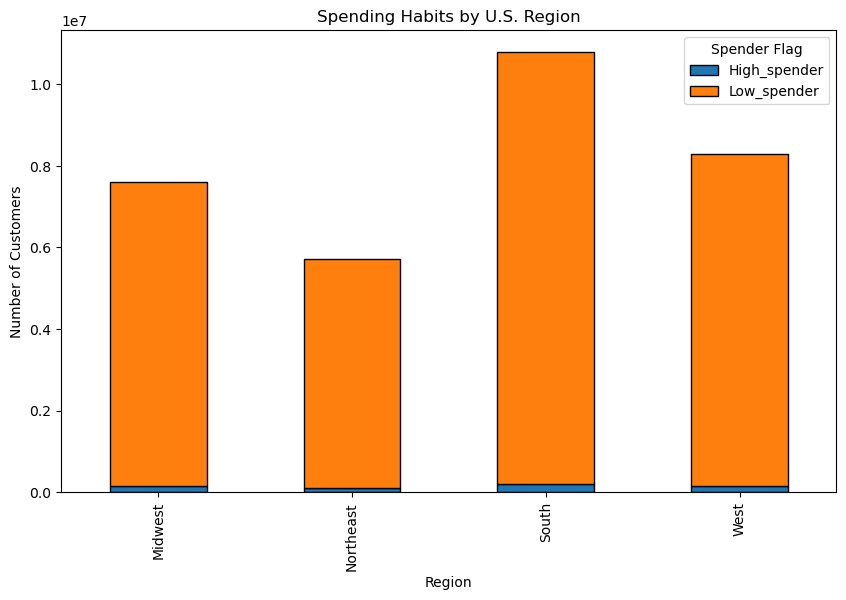

In [27]:
# Plot the stacked bar graph to visualize the results
bar_region = crosstab.plot.bar(stacked=True, figsize=(10, 6), title='Spending Habits by U.S. Region', edgecolor='black')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.legend(title='Spender Flag')
plt.show()

#### Observations from stacked bar graph:
##### Dominance of low spenders indicating that the majority of customers in each region are low spenders.
##### High spenders contribution: indicates this to be very small suggesting high spenders make up only a small fraction of the customer base in each region.
##### Regional comparison: The South has the highest number of customers [combination of both low and high spenders ], followed by the Midwest and West. The South region may require special focus for marketing strategies as it has the largest customer base.
##### Strategies aimed at converting low spenders to high spenders could benefit all regions equally given the uniform distribution of high spender proportions.

In [29]:
#Exporting stacked bar graph
bar_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','3.1_bar_region.png'))

### 4 Create an exclusion flag for low-activity customers

#### As the Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. To then create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
##### I will use the max_order column to flag customers with less than 5 orders, so that I can exclude the low-activity (flagged as 'exclude') from the dataset. An exclusion_flag column will be created and populated with the appropriate flag.

In [80]:
# Flag customers with less than 5 orders as 'Exclude'
ords_prod_merge.loc[ords_prod_merge['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [82]:
# Flag customers with 5 or more orders as 'Keep'
ords_prod_merge.loc[ords_prod_merge['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [84]:
ords_prod_merge.head() # Checking for new exclusion_flag column 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,gender,state,age,date_joined,num_dependents,family_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep


In [86]:
ords_prod_merge['exclusion_flag'].value_counts() # For future reference checks

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [88]:
# Filter to exclude low-activity customers
ords_prod_merge = ords_prod_merge[ords_prod_merge['exclusion_flag'] == 'Keep']

In [90]:
# Display the filtered data
ords_prod_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,gender,state,age,date_joined,num_dependents,family_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep


In [92]:
# Check the filtered data
ords_prod_merge['exclusion_flag'].value_counts()

exclusion_flag
Keep    30964564
Name: count, dtype: int64

##### This illustrates the 'excluded' condition has been removed from the data set and left the exact same number of 'keep' conditions in the data set.

In [94]:
#Exporting Filtered Data to folder
ords_prod_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'ords_prod_updated.pkl'))

### 5 Customer profiling in the Instacart database

### 5.1 To create a profiling variable based first on 'age' I will use the predefined function loc() to achieve this.

In [96]:
# Create age variables <25: "Gen Z", 25–40: "Millennials", 40–65: "Gen X", 65+: "Boomers":
ords_prod_merge.loc[ords_prod_merge['age'] <= 25, 'age_group'] = 'Gen Z'
ords_prod_merge.loc[(ords_prod_merge['age'] > 25) & (ords_prod_merge['age'] <= 40), 'age_group'] = 'Millennials'
ords_prod_merge.loc[(ords_prod_merge['age'] > 40) & (ords_prod_merge['age'] <= 65), 'age_group'] = 'Gen X'
ords_prod_merge.loc[ords_prod_merge['age'] > 65, 'age_group'] = 'Boomers'

In [98]:
ords_prod_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,gender,state,age,date_joined,num_dependents,family_status,income,_merge,region,exclusion_flag,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials


In [100]:
# Check the column has been correctly populated and no rows are missing or misclassified.
print(ords_prod_merge['age_group'].value_counts())

age_group
Gen X          12085297
Boomers         7730834
Millennials     7283915
Gen Z           3864518
Name: count, dtype: int64


In [102]:
# Calculate the total sum of age_group counts
ords_prod_merge['age_group'].value_counts().sum()

30964564

##### This illustrates the 'age_group' condition has the same number of rows as the 'excluded' condition.

In [104]:
# Check for Missing or Outlier Data
print(ords_prod_merge['age'].isnull().sum())

0


In [106]:
# View percentages to understand proportions
ords_prod_merge['age_group'].value_counts(normalize=True) * 100

age_group
Gen X          39.029443
Boomers        24.966714
Millennials    23.523390
Gen Z          12.480453
Name: proportion, dtype: float64

##### Gen X are the largest group with 39% customers
##### Gen Z are the smallest group of customers with 12.5%

In [108]:
# Crosstab to analyze age group by orders_day_of_week
day_analysis = pd.crosstab(ords_prod_merge['age_group'], ords_prod_merge['orders_day_of_week'])

In [110]:
# Display the crosstab
day_analysis

orders_day_of_week,0,1,2,3,4,5,6
age_group,,,,,,,
Boomers,1477029,1336438,1004597,921129,899851,1008597,1083193
Gen X,2295771,2109616,1580665,1432735,1416002,1572293,1678215
Gen Z,735908,678096,499109,455609,452349,506382,537065
Millennials,1399902,1287536,940335,860062,856792,946457,992831


##### All age groups, particularly Gen X and Millennials, exhibit higher order volumes on weekends (6 for Saturday and 0 for Sunday), likely reflecting working schedules and leisure shopping.
##### With nearly 40% of the customer base, Gen X drives the majority of orders and exhibits strong weekend activity, making it a key target demographic for campaigns.

In [112]:
# Group by age group and analyze the average order_hour_of_day
hour_analysis = ords_prod_merge.groupby('age_group')['order_hour_of_day'].mean()

In [114]:
# Display the result
hour_analysis

age_group
Boomers        13.410028
Gen X          13.422956
Gen Z          13.386653
Millennials    13.405032
Name: order_hour_of_day, dtype: float64

#### The average order hour of the day (on a 24-hour scale) for each age group:
##### Boomers: 13.41 (1:25 PM)
##### Gen X: 13.42 (1:25 PM)
##### Gen Z: 13.39 (1:23 PM)
##### Millennials: 13.48 (1:29 PM)

##### All age groups show a strong preference for ordering during midday hours around 1:00 PM to 1:30 PM
##### This consistency suggests that most customers may place orders during lunch breaks or leisure time.

### 5.2 Now I will create a profiling variable based on 'income' using similar methodology.

In [118]:
# Calculate the maximum income
max_income = ords_prod_merge['income'].max()

# Calculate the minimum income
min_income = ords_prod_merge['income'].min()

# Calculate the income range
income_range = max_income - min_income

# Calculate the average income
average_income = ords_prod_merge['income'].mean()

# Display the results
print(f"Maximum income: {max_income}")
print(f"Minimum income: {min_income}")
print(f"Income range: {income_range}")
print(f"Average income: {average_income}")

Maximum income: 593901
Minimum income: 25903
Income range: 567998
Average income: 99675.86510754681


In [120]:
# Check for missing or non-numeric values in the income column
print(ords_prod_merge['income'].isnull().sum())  # Count missing values
print(ords_prod_merge['income'].dtype)          # Check the data type

# Check for outliers (e.g., extreme values)
print(ords_prod_merge['income'].describe())

0
int64
count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64


#### Using these values to define income categories:
##### 25,000–67,290	Low Income	Budget-conscious customers.
##### 67,291–96,769	Lower-Middle Income	Entry-level spending power.
##### 96,770–128,102	Upper-Middle Income	Average income, general consumers.
##### 128,103–200,000	High Income	Higher disposable income group.
##### 200,001+	Very High Income	Premium or affluent customers.

In [122]:
# Creating income profiling variable based on defined categories
ords_prod_merge.loc[ords_prod_merge['income'] <= 67290, 'income_group'] = 'Low Income'
ords_prod_merge.loc[(ords_prod_merge['income'] > 67290) & (ords_prod_merge['income'] <= 96769), 'income_group'] = 'Lower-Middle Income'
ords_prod_merge.loc[(ords_prod_merge['income'] > 96769) & (ords_prod_merge['income'] <= 128102), 'income_group'] = 'Upper-Middle Income'
ords_prod_merge.loc[(ords_prod_merge['income'] > 128102) & (ords_prod_merge['income'] <= 200000), 'income_group'] = 'High Income'
ords_prod_merge.loc[ords_prod_merge['income'] > 200000, 'income_group'] = 'Very High Income'

In [124]:
# Verify the output
print(ords_prod_merge[['income', 'income_group']].head())

   income income_group
0   40423   Low Income
1   40423   Low Income
2   40423   Low Income
3   40423   Low Income
4   40423   Low Income


In [126]:
# Check the table for output.
ords_prod_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,gender,state,age,date_joined,num_dependents,family_status,income,_merge,region,exclusion_flag,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income


In [128]:
# Check the column has been correctly populated and no rows are missing or misclassified.
print(ords_prod_merge['income_group'].value_counts())

income_group
Lower-Middle Income    7742943
Low Income             7740853
Upper-Middle Income    7739677
High Income            7486949
Very High Income        254142
Name: count, dtype: int64


In [130]:
# Calculate the total sum of age_group counts
ords_prod_merge['income_group'].value_counts().sum()

30964564

In [132]:
# Check for Missing or Outlier Data
print(ords_prod_merge['income_group'].isnull().sum())

0


In [134]:
# View percentages to understand proportions
ords_prod_merge['income_group'].value_counts(normalize=True) * 100

income_group
Lower-Middle Income    25.005820
Low Income             24.999070
Upper-Middle Income    24.995272
High Income            24.179087
Very High Income        0.820751
Name: proportion, dtype: float64

##### Lower-Middle Income are the largest group with 25% customers
##### Very High Income are the smallest group of customers with 0.82%

In [136]:
# Crosstab to analyze age group by orders_day_of_week
day_analysis_2 = pd.crosstab(ords_prod_merge['income_group'], ords_prod_merge['orders_day_of_week'])

In [138]:
# Display the crosstab
day_analysis_2

orders_day_of_week,0,1,2,3,4,5,6
income_group,,,,,,,
High Income,1471593,1278828,959229,881835,869938,956129,1069397
Low Income,1348271,1437968,1045542,945153,934001,1045306,984612
Lower-Middle Income,1538693,1325428,995501,905201,895305,988434,1094381
Upper-Middle Income,1509179,1323920,990500,905542,892654,1007176,1110706
Very High Income,40874,45542,33934,31804,33096,36684,32208


##### Day 0 (likely Sunday, depending on the calendar) consistently has the highest order volume across all income groups.
##### Day 4 (likely midweek) has the lowest activity for most group.
##### The "Very High Income" group has substantially lower order volumes across all days compared to other groups.
##### Data indicates that weekends or early in the week (Day 0) are the most popular times for placing orders, regardless of income group.

In [140]:
# Group by income group and analyze the average order_hour_of_day
hour_analysis_2 = ords_prod_merge.groupby('income_group')['order_hour_of_day'].mean()

In [142]:
# Display the result
hour_analysis_2

income_group
High Income            13.460370
Low Income             13.316057
Lower-Middle Income    13.431226
Upper-Middle Income    13.444543
Very High Income       13.208391
Name: order_hour_of_day, dtype: float64

#### The average order hour of the day (on a 24-hour scale) for each income group:
##### High Income: Average order hour is 13.46 (approximately 1:28 PM)
##### Low Income: Average order hour is 13.32 (approximately 1:19 PM).
##### Lower-Middle Income: Average order hour is 13.43 (approximately 1:26 PM).
##### Upper-Middle Income: Average order hour is 13.44 (approximately 1:27 PM).
##### Very High Income: Average order hour is 13.21 (approximately 1:12 PM).

##### Across all income groups, the average order time is around early afternoon, specifically between 1:12 PM and 1:28 PM.
##### The Very High Income group places orders slightly earlier on average compared to other groups.
##### The differences between groups are minimal, indicating similar order behavior throughout the day regardless of income level.

### 5.3 Now I will create a profiling variable based on 'number of dependents' using similar methodology.

#### I will define 'number of dependents' by:
##### 0 dependents: Single/Couple.
##### 1 dependent: Small family.
##### 2 dependents: Medium-sized families.
##### 3+ dependents: Larger families.

##### As I am mapping specific values (e.g., 0, 1, 2, 3+) I will use .apply(), as this function allows you to process each row or element of a column, making the code concise and easier to read and modify later (as  .loc lines for each condition, making the code longer and harder to maintain).

In [145]:
# Define the categories
def categorize_dependents(num):
    if num == 0:
        return "Single/Couple (No Dependants)"
    elif num == 1:
        return "Small Family (1 Dependnant)"
    elif num == 2:
        return "Medium Family (2 Dependnants)"
    else: #3 or more
        return "Large Family (3+ Dependants)"

In [151]:
# Apply the categorization
ords_prod_merge['dependents_profile'] = ords_prod_merge['num_dependents'].apply(categorize_dependents)

# Display the new column
print(ords_prod_merge[['num_dependents', 'dependents_profile']].head())

   num_dependents            dependents_profile
0               3  Large Family (3+ Dependants)
1               3  Large Family (3+ Dependants)
2               3  Large Family (3+ Dependants)
3               3  Large Family (3+ Dependants)
4               3  Large Family (3+ Dependants)


In [149]:
# Check the table for output
ords_prod_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,gender,state,age,date_joined,num_dependents,family_status,income,_merge,region,exclusion_flag,age_group,income_group,dependents_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)


In [153]:
# Check the column has been correctly populated and no rows are missing or misclassified.
print(ords_prod_merge['dependents_profile'].value_counts())

dependents_profile
Large Family (3+ Dependants)     7772516
Single/Couple (No Dependants)    7739681
Medium Family (2 Dependnants)    7733261
Small Family (1 Dependnant)      7719106
Name: count, dtype: int64


In [155]:
# Calculate the total sum of age_group counts
ords_prod_merge['dependents_profile'].value_counts().sum() # Check same number of rows as previous profile columns.

30964564

In [157]:
# Check for Missing or Outlier Data
print(ords_prod_merge['dependents_profile'].isnull().sum())

0


In [159]:
# View percentages to understand proportions
ords_prod_merge['dependents_profile'].value_counts(normalize=True) * 100

dependents_profile
Large Family (3+ Dependants)     25.101326
Single/Couple (No Dependants)    24.995285
Medium Family (2 Dependnants)    24.974552
Small Family (1 Dependnant)      24.928838
Name: proportion, dtype: float64

##### The distribution of dependents profiles is nearly even across all categories, with large families (3+ dependents) being slightly more common at 25.10%. 

In [161]:
# Crosstab to analyze dependents_profile by orders_day_of_week
day_analysis_3 = pd.crosstab(ords_prod_merge['dependents_profile'], ords_prod_merge['orders_day_of_week'])

In [163]:
# Display the crosstab
day_analysis_3

orders_day_of_week,0,1,2,3,4,5,6
dependents_profile,,,,,,,
Large Family (3+ Dependants),1489437,1362820,1019060,918747,904116,1001099,1077237
Medium Family (2 Dependnants),1472719,1338837,1004790,921774,907389,1011157,1076595
Single/Couple (No Dependants),1477078,1362350,1002581,917042,905259,1014174,1061197
Small Family (1 Dependnant),1469376,1347679,998275,911972,908230,1007299,1076275


##### Day 0 (Sunday) has the largest number of orders across all dependents profiles. 
##### Days 2, 3, 4 (Tuesday, Wednesday, Thurday) have a pattern of less orders comparitively. 
##### Large families (3+ dependents) have the highest number of orders across all days, followed closely by the other profiles.

In [165]:
# Group by dependents_profile and analyze the average order_hour_of_day
hour_analysis_3 = ords_prod_merge.groupby('dependents_profile')['order_hour_of_day'].mean()

In [167]:
# Display the result
hour_analysis_3

dependents_profile
Large Family (3+ Dependants)     13.420022
Medium Family (2 Dependnants)    13.414080
Single/Couple (No Dependants)    13.421183
Small Family (1 Dependnant)      13.388545
Name: order_hour_of_day, dtype: float64

##### The average order hour of the day is consistent across all dependents profiles, ranging between 13.38 and 13.42 (around early afternoon).
##### Large families (3+ dependents) place orders slightly later on average compared to other profiles.

### 6 Create an appropriate visualization to show the distribution of profiles

### 6.1 Age Group Visualizations

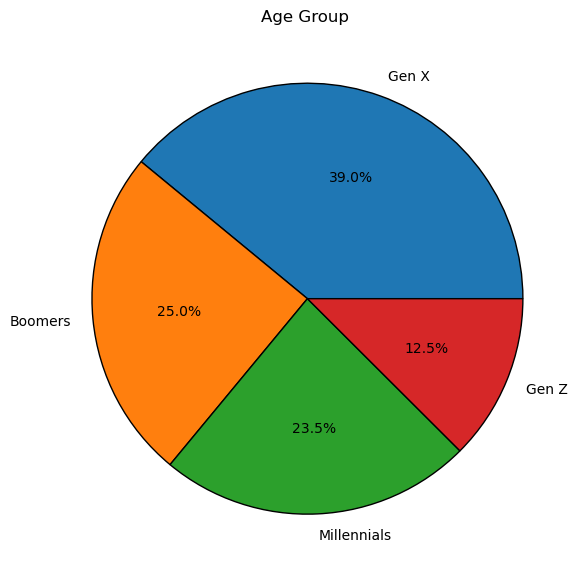

In [169]:
#  I will complete a pie chart to illustrate the age_group percentages to understand proportions

# Age Group Distribution Visualization Pie Chart
pie_age_group_counts = ords_prod_merge['age_group'].value_counts()
plt.figure(figsize=(6,6))
age_group_pie_chart=pie_age_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Age Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [97]:
# Export pie chart

age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','6.1_age_group_pie_chart.png'))

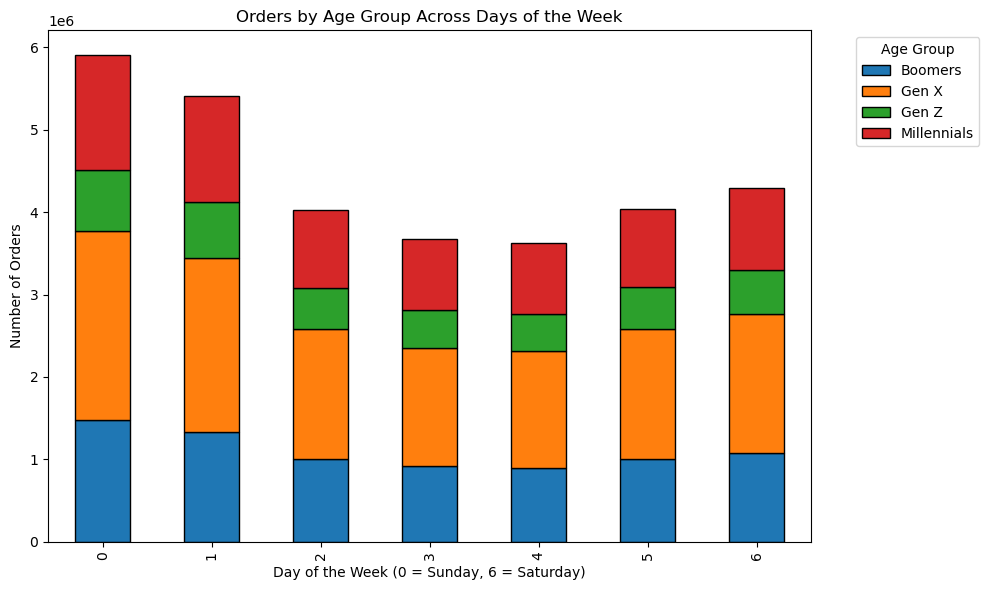

In [171]:
# I will use a stacked graph for Orders by Age Group Across Days of the Week

# Crosstab data
age_group_day_analysis = pd.crosstab(ords_prod_merge['age_group'], ords_prod_merge['orders_day_of_week'])

# Create the stacked bar chart
stacked_bar_chart = age_group_day_analysis.T.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    edgecolor='black'
)

# Customize chart labels and title
plt.title('Orders by Age Group Across Days of the Week')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Number of Orders')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [99]:
# Export the figure
output_path = os.path.join(path, '04 Analysis', 'Visualizations', '6.1.2_stacked_bar_chart.png')
stacked_bar_chart.figure.savefig(output_path)

# Display the chart
plt.show()

### 6.2 Income Groups Visualizations

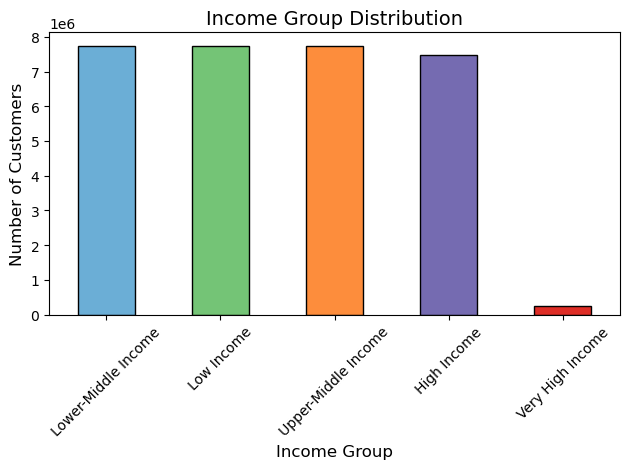

In [173]:
# I will create a bar chart to visualizae the portion of income groups emphasize the percentage values in a more structured and comparative format.

# Create a bar chart, using colors generated so that colour blind viewers can see.
bar_income_group = ords_prod_merge['income_group'].value_counts().plot.bar(color=['#6baed6', '#74c476', '#fd8d3c', '#756bb1', '#de2d26'], edgecolor='black')
plt.title('Income Group Distribution', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [102]:
# Export Bar Chart

bar_income_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','6.2_bar_income_group.png'))

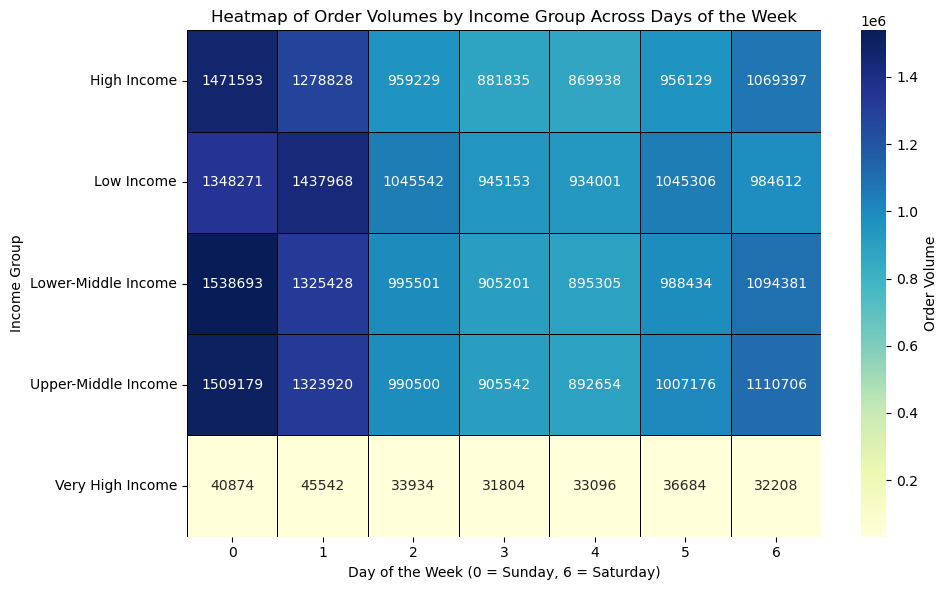

In [175]:
# Create a heatmap of income groups and order day in the week portions
plt.figure(figsize=(10, 6))
income_heat_map = sns.heatmap(
    day_analysis_2,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="black",
    cbar_kws={'label': 'Order Volume'}
)

# Add titles and labels
plt.title('Heatmap of Order Volumes by Income Group Across Days of the Week')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Income Group')
plt.tight_layout()

# Show the heatmap
plt.show()

# Export the heatmap
income_heat_map.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.2.1_income_heat_map.png'))

### 6.3 Dependents_profile Groups Visualizations

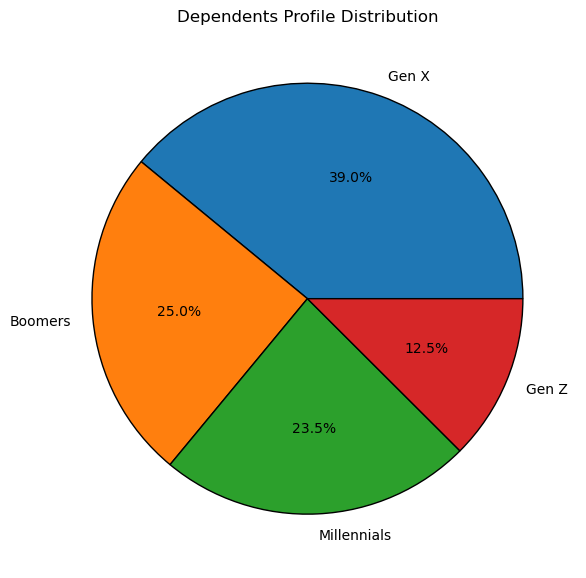

In [177]:
#  I will complete a pie chart to illustrate the dependents_profile percentages to understand proportions

# Create a pie chart for dependents_profile distribution
pie_dep_profile = ords_prod_merge['dependents_profile'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    pie_age_group_counts,
    labels=pie_age_group_counts.index,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Dependents Profile Distribution')
plt.tight_layout()

# Save the pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.3_pie_dep_profile.png'))

# Show the pie chart
plt.show()

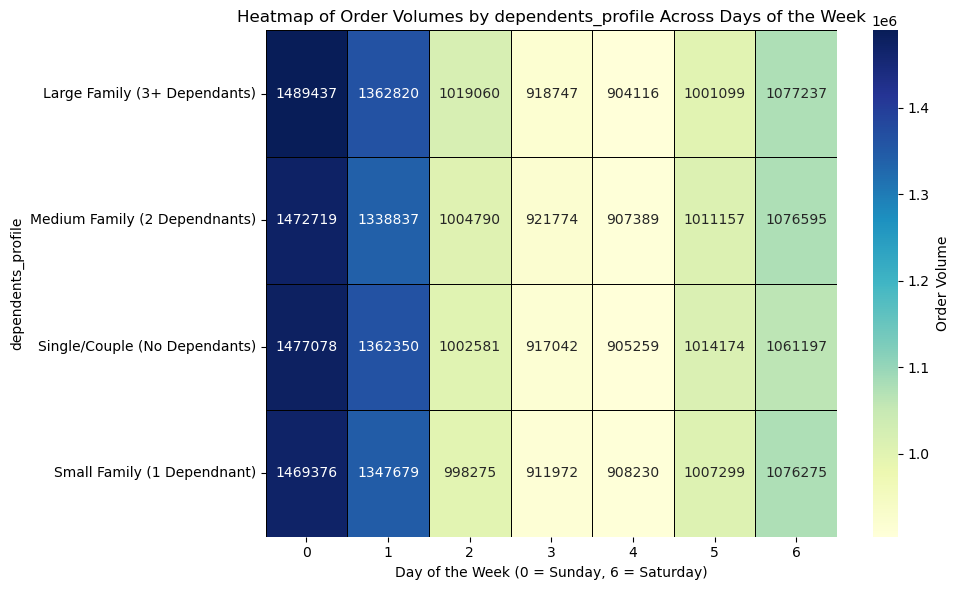

In [179]:
# Create a heatmap of dependents_profile and order day in the week portions
plt.figure(figsize=(10, 6))
sns.heatmap(
    day_analysis_3,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,  # Add cell borders
    linecolor='black',  # Color of the borders
    cbar_kws={'label': 'Order Volume'}
)
plt.title('Heatmap of Order Volumes by dependents_profile Across Days of the Week')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('dependents_profile')
plt.tight_layout()

# Save the pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.3.1_dep_profile_heat_map.png'))

# Show the heatmap
plt.show()

### 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [181]:
# Display all columns in a DataFrame when it is printed or displayed, regardless of how many columns there are.
pd.set_option('display.max_columns', None)

In [183]:
ords_prod_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency,gender,state,age,date_joined,num_dependents,family_status,income,_merge,region,exclusion_flag,age_group,income_group,dependents_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants)


In [185]:
ords_prod_merge.shape

(30964564, 35)

In [187]:
# Group by user_id (customer level)
customer_profile_aggregation = ords_prod_merge.groupby('user_id').agg({
    'days_since_last_order': ['max', 'mean', 'min'],  # Usage frequency
    'prices': ['max', 'mean', 'min'],  # Expenditure
    'order_number': ['max', 'mean', 'min']  # Order history insight
})

In [189]:
# Rename columns for better readability
customer_profile_aggregation.columns = ['_'.join(col).strip() for col in customer_profile_aggregation.columns]

In [191]:
# Reset index for better handling and inspection
customer_profile_aggregation.reset_index(inplace=True)

In [193]:
customer_profile_aggregation

,user_id,days_since_last_order_max,days_since_last_order_mean,days_since_last_order_min,prices_max,prices_mean,prices_min,order_number_max,order_number_mean,order_number_min
0,1,30.0,20.259259,0.0,14.0,6.367797,1.0,10,5.813559,1
1,2,30.0,15.967033,3.0,14.8,7.515897,1.3,14,8.035897,1
2,3,21.0,11.487179,7.0,14.4,8.197727,1.3,12,6.000000,1
3,4,21.0,15.357143,0.0,14.6,8.205556,1.4,5,2.888889,1
4,7,30.0,13.546392,2.0,23.2,7.466990,1.1,20,9.645631,1
...,...,...,...,...,...,...,...,...,...,...
162626,206203,30.0,29.103093,27.0,25.0,7.138655,1.0,5,2.983193,1
162627,206206,15.0,4.042705,0.0,14.8,7.646667,1.1,67,38.007018,1
162628,206207,30.0,14.879397,1.0,24.7,7.313453,1.2,16,8.116592,1
162629,206208,20.0,7.442105,0.0,21.6,8.366617,1.1,49,25.505170,1


In [195]:
# To ensure age_group, income_group, dependents_flag are part of customer_profile_aggregation df
customer_profile_aggregation = pd.merge(
    customer_profile_aggregation,
    ords_prod_merge[['user_id', 'age_group', 'income_group', 'dependents_profile']].drop_duplicates(),
    on='user_id',
    how='left'
)

### 7.1 Age_group

In [197]:
# Group by age_group
age_agg = customer_profile_aggregation.groupby('age_group').agg({
    'days_since_last_order_mean': ['mean', 'min', 'max'],
    'prices_mean': ['mean', 'min', 'max']
})

In [199]:
age_agg

days_since_last_order_mean                 prices_mean          \
                                  mean       min   max        mean     min   
age_group                                                                    
Boomers                      14.307118  0.000000  30.0    7.757124  1.2625   
Gen X                        14.364543  0.000000  30.0    7.751029  1.0000   
Gen Z                        14.333850  0.583333  30.0    7.750304  2.0000   
Millennials                  14.355329  0.000000  30.0    7.748883  1.0000   

                        
                   max  
age_group               
Boomers      19.400000  
Gen X        20.114286  
Gen Z        14.900000  
Millennials  18.233333

### 7.2 Income_group

In [201]:
# Group by income_group
income_agg = customer_profile_aggregation.groupby('income_group').agg({
    'days_since_last_order_mean': ['mean', 'min', 'max'],
    'prices_mean': ['mean', 'min', 'max']
})

In [203]:
income_agg

days_since_last_order_mean                 prices_mean  \
                                          mean       min   max        mean   
income_group                                                                 
High Income                          14.181975  0.232558  30.0    8.048374   
Low Income                           14.750125  0.000000  30.0    7.049147   
Lower-Middle Income                  14.146668  0.288591  30.0    8.051018   
Upper-Middle Income                  14.222764  0.000000  30.0    8.053106   
Very High Income                     12.770064  0.717842  30.0    7.765378   

                                          
                          min        max  
income_group                              
High Income          4.433333  20.114286  
Low Income           1.000000  14.423077  
Lower-Middle Income  5.375000  18.233333  
Upper-Middle Income  5.283607  19.400000  
Very High Income     4.370588  10.548876

### 7.3 Dependents_profile

In [205]:
# Group by dependents_flag
dependents_agg = customer_profile_aggregation.groupby('dependents_profile').agg({
    'days_since_last_order_mean': ['mean', 'min', 'max'],
    'prices_mean': ['mean', 'min', 'max']
})

In [207]:
dependents_agg

days_since_last_order_mean                  \
                                                    mean       min   max   
dependents_profile                                                         
Large Family (3+ Dependants)                   14.321677  0.304428  30.0   
Medium Family (2 Dependnants)                  14.346911  0.000000  30.0   
Single/Couple (No Dependants)                  14.361036  0.000000  30.0   
Small Family (1 Dependnant)                    14.347056  0.333333  30.0   

                              prices_mean                     
                                     mean     min        max  
dependents_profile                                            
Large Family (3+ Dependants)     7.757220  1.2625  20.114286  
Medium Family (2 Dependnants)    7.749642  1.0000  15.706667  
Single/Couple (No Dependants)    7.747521  1.0000  16.931250  
Small Family (1 Dependnant)      7.753488  1.3000  19.400000

### 8 Compare your customer profiles with regions and departments.

In [209]:
# Importing the Department data
dept_data = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [211]:
dept_data

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [213]:
ords_prod_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Match', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'order_median_gap', 'customer_frequency', 'gender',
       'state', 'age', 'date_joined', 'num_dependents', 'family_status',
       'income', '_merge', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'dependents_profile'],
      dtype='object')

In [215]:
# Rename index column to department_id for merge 
dept_data = dept_data.reset_index().rename(columns={'index': 'department_id'})

In [217]:
dept_data

,department_id,department
0,0,frozen
1,1,other
2,2,bakery
3,3,produce
4,4,alcohol
5,5,international
6,6,beverages
7,7,pets
8,8,dry goods pasta
9,9,bulk


In [219]:
#Merging instacart dataset with department dataset
ords_prod_dept_merge = ords_prod_merge.merge(dept_data, on = 'department_id', how = 'left', indicator = 'merge_status')

In [221]:
ords_prod_dept_merge.shape # Confirming the same number of rows in the new merged df

(30964564, 37)

In [223]:
# Confirm the merge has matched the department_id columns
print(ords_prod_dept_merge[['department_id', 'department']].head())

   department_id department
0              7       pets
1             16  household
2             19       deli
3             19       deli
4             17     babies


In [225]:
# Exporting New Merged Dataframe
ords_prod_dept_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prod_dept_merge.pkl'))

In [10]:
#Importing Merged Data
ords_prod_dept_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prod_dept_merge.pkl'))

In [12]:
ords_prod_dept_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,family_status,income,_merge,region,exclusion_flag,age_group,income_group,dependents_profile,department,merge_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants),pets,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants),household,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants),deli,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants),deli,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,married,40423,both,South,Keep,Millennials,Low Income,Large Family (3+ Dependants),babies,both


In [231]:
# Create a crosstab for regions and departments
region_dept_cross = pd.crosstab(ords_prod_dept_merge['region'], ords_prod_dept_merge['department'], dropna=False)

# Display the crosstab
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,NaN
region,,,,,,,,,,,,,,,,,,,,,
Midwest,2134115,166992,7983,60666,420334,193463,156155,237459,645143,21358,1212490,34043,100398,234464,498225,158260,7929,598979,261753,95741,15563
Northeast,1593004,124604,6268,44678,312731,143817,117904,176936,493154,17734,914616,25017,74765,178398,370436,118571,5599,462929,199300,72712,11512
South,3027476,230061,11579,84649,591754,272813,223172,337458,916780,29909,1723016,48813,142496,333620,709906,224120,11180,859419,371620,139511,21787
West,2324678,178200,8581,65998,457886,212043,173619,260221,711329,24059,1327060,36754,106647,257352,543164,173830,8743,650574,288155,102428,15906


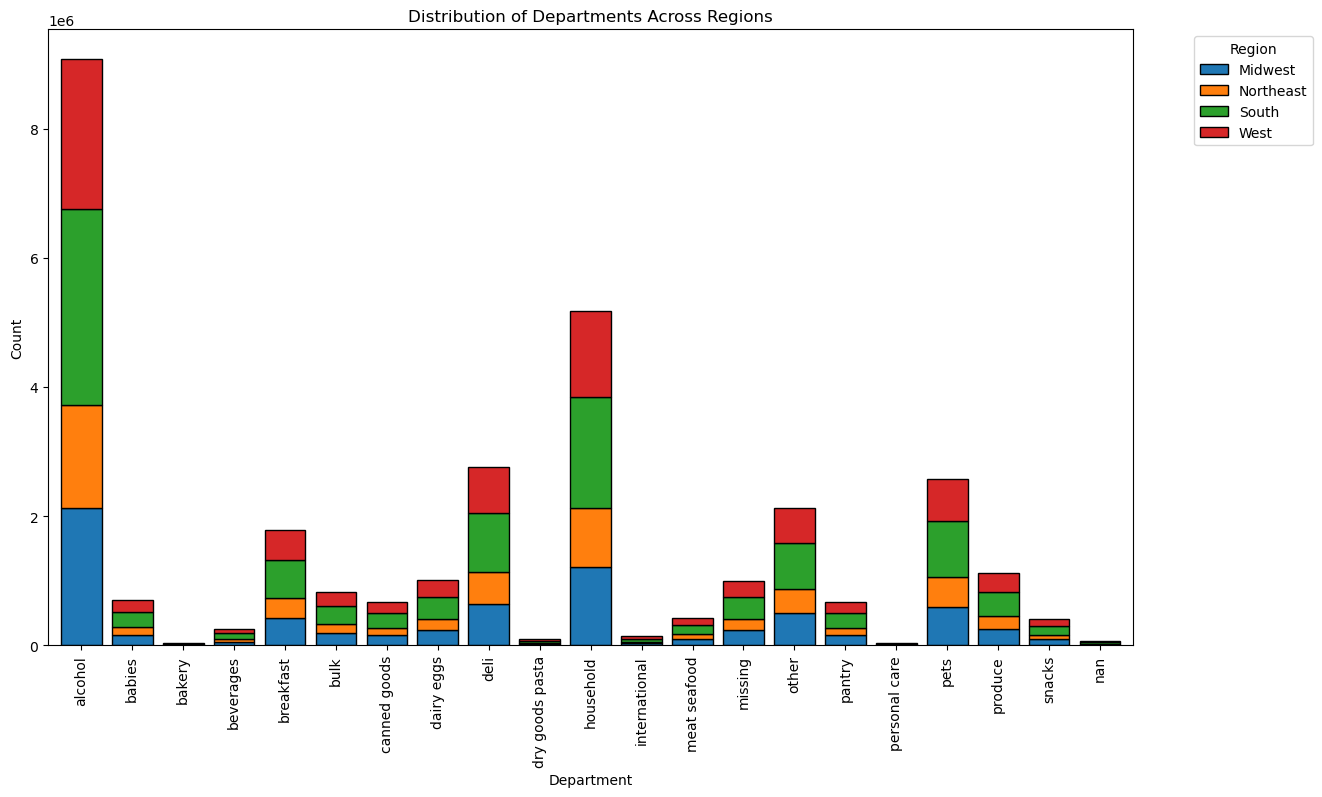

In [233]:
# Show proportions of departments within each region.
dept_stack = region_dept_cross.T.plot(
    kind='bar', stacked=True, figsize=(14, 8), width=0.8, edgecolor='black'
)
plt.title('Distribution of Departments Across Regions')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Distribution of Departments Across Regions

##### The South and West regions contribute significantly to total orders compared to the Midwest and Northeast.
##### Certain departments like alcohol, household, and dry goods pasta dominate the overall distribution.

##### Alcohol: The South region has the highest count of orders, followed by the West, making it a prominent category in these regions.
##### Household: This department sees a significant contribution across all regions but is most dominant in the South.
##### Deli and pets have lower contributions compared to other departments, suggesting less regional reliance on these categories.

##### The Midwest & Northeast contribute less to total counts for most departments, indicating smaller customer bases or market activity.
##### Smaller departments like snacks, bulk, and personal care contribute marginally in all regions.

In [258]:
# Export Stacked Bar Chart
Dept_stack_1 = dept_stack.get_figure()  # Get the figure object from the axes
output_path = os.path.join(path, '04 Analysis', 'Visualizations', '8.0_bar_region_department.png')
Dept_stack_1.savefig(output_path)

plt.show()

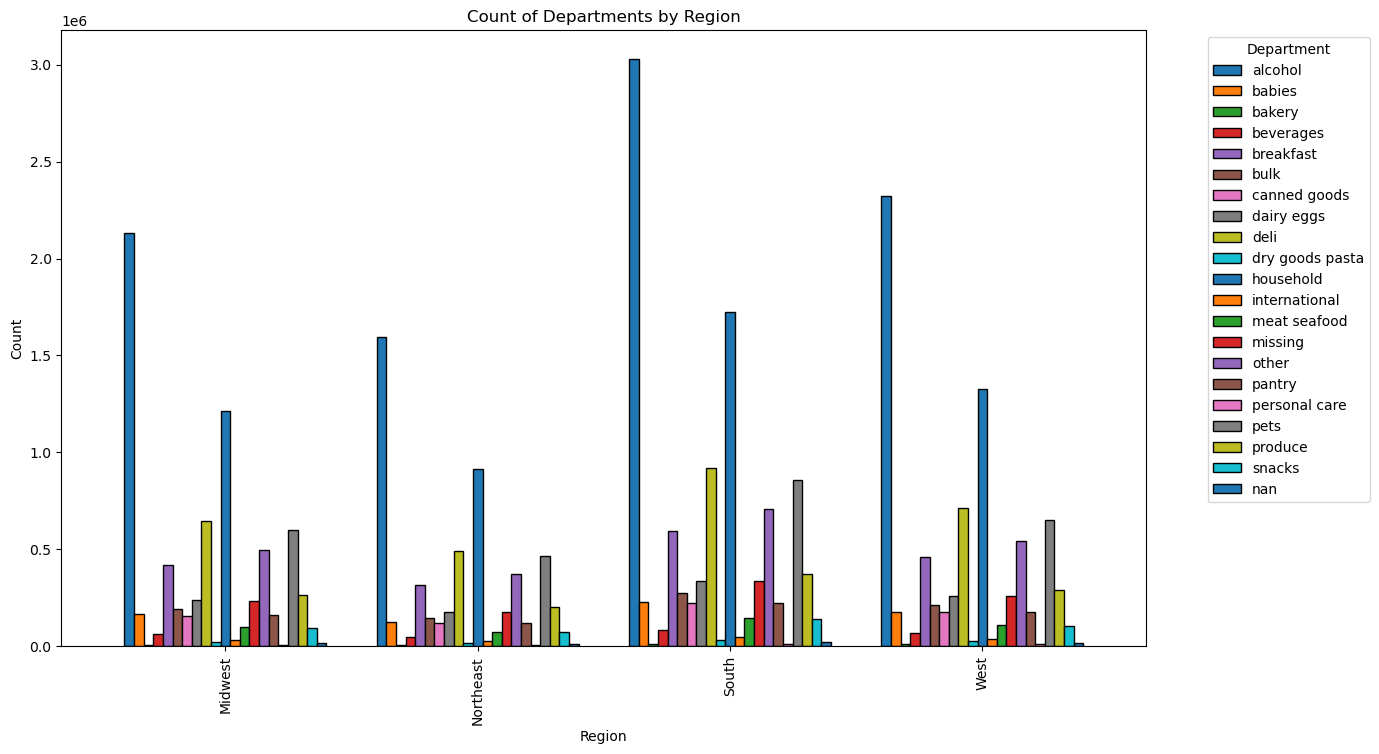

In [235]:
# Illustrate detailed side-by-side comparison of regions for each department.
dept_group = region_dept_cross.plot(
    kind='bar', figsize=(14, 8), width=0.8, edgecolor='black'
)
plt.title('Count of Departments by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Count of Departments by Region
##### The South shows the highest order counts across most departments, confirming its strong market activity.
##### The Midwest and Northeast have consistently lower order counts for all departments, highlighting smaller market shares in these regions.

##### Alcohol and household departments dominate across all regions, with the South region taking the lead.
##### Smaller categories like deli, pets, and personal care have minor contributions, consistent across regions.

##### Departments like dairy eggs and dry goods pasta have a more evenly distributed contribution across all regions compared to other departments.

In [141]:
# Export Grouped Bar Chart
dept_group = dept_stack.get_figure() 
output_path = os.path.join(path, '04 Analysis', 'Visualizations', '8.2_group_region_department.png')
dept_group.savefig(output_path)

plt.show()

#### General Key Takeaways:
##### The South is the most active region, dominating across most departments.
##### Alcohol, household, and dry goods pasta are the top-performing departments across all regions.
##### The Midwest and Northeast regions consistently show lower activity across all departments- 'Underperforming Regions'.
##### Indicates the South region should be prioritized for marketing efforts targeting top-performing departments like alcohol and household.
##### For the Midwest and Northeast, strategies could focus on increasing sales in underperforming departments like personal care and pets.

### 8.1 Age_group comparison within regions and departments

In [237]:
# Crosstab for Age_group within regions and departments
age_region_dept_cross = pd.crosstab(
    [ords_prod_dept_merge['department']],  # Rows: Department
    ords_prod_dept_merge['age_group'],   # Columns: Age group
    dropna=False
)

# Display the crosstab
age_region_dept_cross

age_group,Boomers,Gen X,Gen Z,Millennials
department,,,,
alcohol,2269085,3537942,1127726,2144520
babies,176427,272965,86814,163651
bakery,8350,13456,4456,8149
beverages,63227,99569,32374,60821
breakfast,445174,698528,222086,416917
bulk,205473,320464,104198,192001
canned goods,165491,263325,85477,156557
dairy eggs,251940,394312,126312,239510
deli,688474,1076915,345616,655401


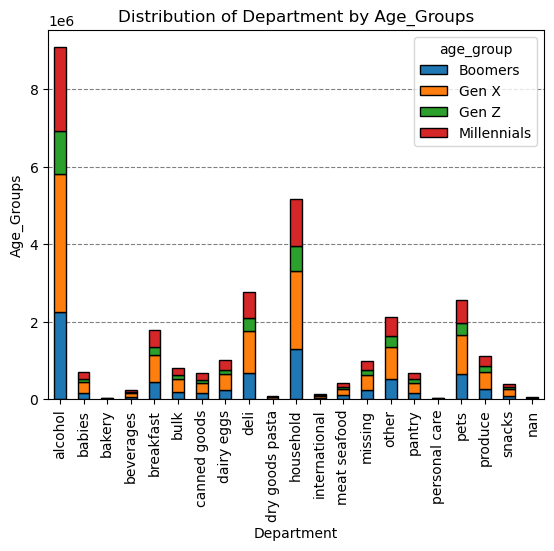

In [239]:
# Plot a stacked bar chart for comparing Age Groups across Departments within Regions
age_region_dept = age_region_dept_cross.plot.bar(stacked =True, edgecolor='black')

plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

plt.title('Distribution of Department by Age_Groups')
plt.xlabel('Department')
plt.ylabel('Age_Groups')

# Exporting bar chart
age_region_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_age_department.png'))

#### Distribution of Department by age_group
##### Alcohol and Household are the most popular departments across all age groups, with Boomers and Gen X leading these categories.
##### Deli, Produce, and Dairy Eggs are moderately popular across age groups.

##### Gen X contributes significantly to Alcohol, Household, and Deli categories.
##### Millennials are active in Alcohol, Household, and Produce but have smaller contributions overall.
##### Gen Z shows minimal participation, with notable presence in Alcohol and Household.

##### Personal Care, International, and Bulk have low engagement across all age groups.
##### Departments like Produce, Snacks, and Pets could benefit from targeted campaigns for Millennials and Gen Z.

In [241]:
# Crosstab for Age_group within regions and departments
age_region_dept_cross_2 = pd.crosstab(
    [ords_prod_dept_merge['region'], ords_prod_dept_merge['department']],  # Rows: Region and Department
    ords_prod_dept_merge['age_group'],   # Columns: Age group
    dropna=False
)

# Display the crosstab
age_region_dept_cross_2

age_group              Boomers   Gen X   Gen Z  Millennials
region  department                                         
Midwest alcohol         534642  840165  258899       500409
        babies           41916   65394   21793        37889
        bakery            1920    3096    1062         1905
        beverages        14886   23673    7962        14145
        breakfast       104640  167049   52862        95783
...                        ...     ...     ...          ...
West    personal care     2168    3466    1030         2079
        pets            163537  256402   78543       152092
        produce          71828  113237   35683        67407
        snacks           25717   39978   11910        24823
        NaN               3637    6453    2023         3793

[84 rows x 4 columns]

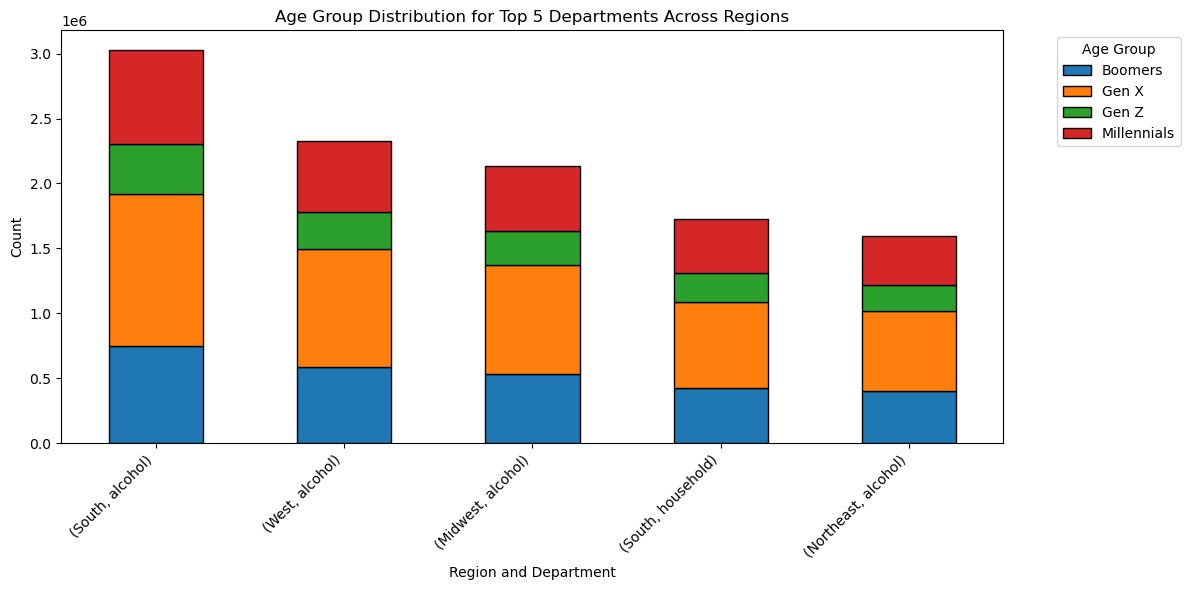

In [243]:
# Show more detailed data of only the top 5 departments by sales
top_departments = age_region_dept_cross_2.sum(axis=1).nlargest(5).index
simplified_data = age_region_dept_cross_2.loc[top_departments]

ax = simplified_data.plot(
    kind='bar', stacked=True, figsize=(12, 6), edgecolor='black'
)
plt.title('Age Group Distribution for Top 5 Departments Across Regions')
plt.xlabel('Region and Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure
fig = ax.get_figure()  # Get the associated figure object
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_age_department.png')

# Ensure directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

fig.savefig(output_path)
plt.show()

#### Detailed Age Group Distribution for Top 5 Departments Across Regions
##### The South region dominates Alcohol sales, with the highest total contribution from all age groups.
##### Boomers and Gen X are the largest contributors in the Alcohol department in all regions, highlighting their dominance in this category.
##### The Household department in the South ranks as the second most significant category overall, with strong contributions from Boomers and Gen X.
##### Millennials contribute notably across all regions, particularly in the Alcohol & Household departments, suggesting for targeted marketing.
##### The South region is a clear leader in both Alcohol and Household categories, making it a high-priority market for age-targeted strategies.
##### The West region also performs well, particularly in Alcohol, while the Midwest and Northeast show opportunities for growth.

### 8.2 Income_group comparison within regions and departments

In [245]:
income_region_comparison = pd.crosstab(ords_prod_dept_merge['income_group'],ords_prod_dept_merge['region'],dropna = False)

In [247]:
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
High Income,1777745,1332732,2465821,1910651
Low Income,1790670,1366922,2593220,1990041
Lower-Middle Income,1778109,1355916,2640447,1968471
Upper-Middle Income,1850896,1369009,2528205,1991567
Very High Income,64093,40106,83446,66497


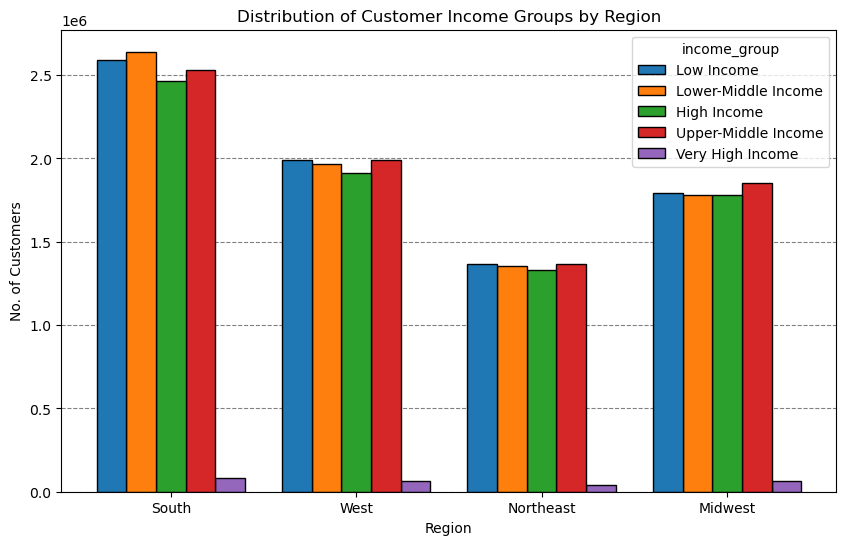

In [258]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=ords_prod_dept_merge, 
    x='region', 
    hue='income_group', 
    multiple='dodge', 
    shrink=0.8, 
    alpha=1, 
    edgecolor='black'  # Add black edge lines
)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  
plt.grid(axis='y', color='gray', linestyle='dashed')

plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '8.2_income_group_by_region.png'), bbox_inches='tight')

# Display the plot
plt.show()

#### Data reveals:

##### The South and West regions show the highest representation of low and lower-middle income groups, indicating a strong presence of budget-conscious customers in these areas.
##### The Midwest and Northeast regions, however, dominate in the high and very high-income categories, making them key targets for premium products and services.
##### The upper-middle income group is consistently strong across all regions, particularly in the South, suggesting a significant middle-class customer base. 
##### While the South has the largest overall number of customers, the Midwest displays a more balanced distribution across all income categories.
##### The Northeast has the smallest total customer count but a notable concentration of very high-income individuals, further emphasizing its potential for luxury or high-end offerings.
##### These insights suggest tailoring product and marketing strategies to regional income dynamics, focusing on affordability in the South and West while leveraging the premium market potential in the Northeast and Midwest.

In [40]:
# Crosstab using the 'income_group' column
income_region_dept_cross = pd.crosstab(
    ords_prod_dept_merge['department'], 
    ords_prod_dept_merge['income_group'],  # Use the pre-created column
    dropna=False
)

# Display the crosstab
income_region_dept_cross

income_group,High Income,Low Income,Lower-Middle Income,Upper-Middle Income,Very High Income
department,,,,,
alcohol,2333348,2238723,2429002,2427937,50281
babies,173973,196446,178138,178367,11742
bakery,8642,9146,9023,8998,482
beverages,66448,61580,70217,68933,2075
breakfast,462439,444798,472631,479295,16206
bulk,216366,192616,224618,225995,7032
canned goods,163304,198229,166878,168001,6621
dairy eggs,269740,238422,275398,275206,9292
deli,601917,1009760,629359,623195,23319


In [263]:
print(income_region_dept_cross.dtypes)
print(income_region_dept_cross.head())


income_group
High Income            int64
Low Income             int64
Lower-Middle Income    int64
Upper-Middle Income    int64
Very High Income       int64
dtype: object
income_group  High Income  Low Income  Lower-Middle Income  \
department                                                   
alcohol           2333348     2238723              2429002   
babies             173973      196446               178138   
bakery               8642        9146                 9023   
beverages           66448       61580                70217   
breakfast          462439      444798               472631   

income_group  Upper-Middle Income  Very High Income  
department                                           
alcohol                   2427937             50281  
babies                     178367             11742  
bakery                       8998               482  
beverages                   68933              2075  
breakfast                  479295             16206  


In [267]:
departments = [str(dept) for dept in income_region_dept_cross.index]


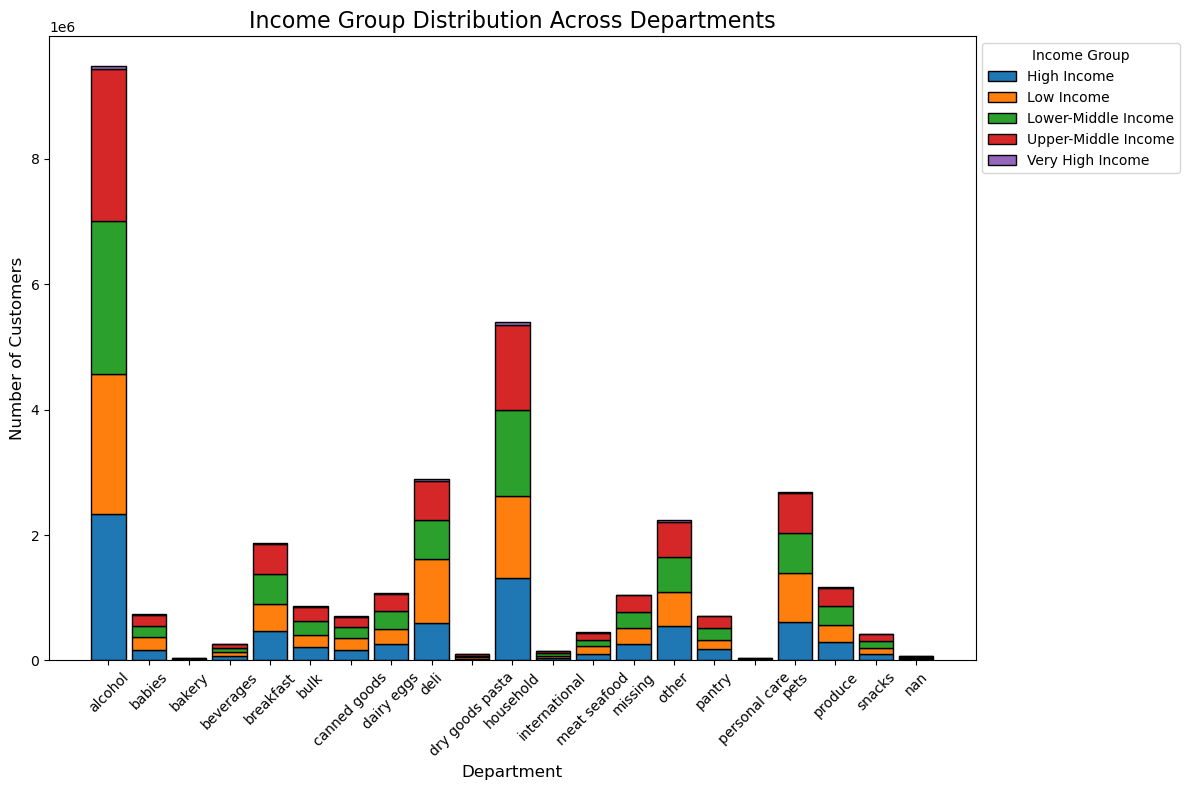

In [269]:
import matplotlib.pyplot as plt
import os

# Prepare data
categories = income_region_dept_cross.columns.tolist()  # Income groups
departments = [str(dept) for dept in income_region_dept_cross.index]  # Ensure departments are strings
values = income_region_dept_cross.values  # Numeric data for plotting

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.85  # Width of each bar
bottom = [0] * len(departments)  # Initialize the bottom of each bar

# Loop through each category to stack bars
for i, category in enumerate(categories):
    ax.bar(
        departments, 
        values[:, i], 
        bar_width, 
        label=category, 
        bottom=bottom, 
        edgecolor='black'  # Add black edges
    )
    bottom = [sum(x) for x in zip(bottom, values[:, i])]  # Update the bottom for the next category

# Customize the chart
ax.set_title('Income Group Distribution Across Departments', fontsize=16)
ax.set_xlabel('Department', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xticks(range(len(departments)))
ax.set_xticklabels(departments, rotation=45, fontsize=10)
ax.legend(title='Income Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Ensure everything fits in the plot

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '8.2.1_income_group_by_region_dept.png'), bbox_inches='tight')

# Show the plot
plt.show()


##### The results of this chart are very similar to the chart that shows the distribution of departments across regions!
##### oth charts are complementary: one explores geographic trends (Chart 1), and the other delves into socioeconomic segmentation (Chart 2). Together, they provide a well-rounded understanding of customer behavior.

### 8.3 Dependents_profile comparison within regions and departments

In [275]:
depend_region_comp  = pd.crosstab(ords_prod_dept_merge['dependents_profile'],ords_prod_dept_merge['region'],dropna = False)

In [277]:
depend_region_comp

region,Midwest,Northeast,South,West
dependents_profile,,,,
Large Family (3+ Dependants),1787286,1381233,2585864,2018133
Medium Family (2 Dependnants),1809994,1351961,2603717,1967589
Single/Couple (No Dependants),1822816,1354482,2581933,1980450
Small Family (1 Dependnant),1841417,1377009,2539625,1961055


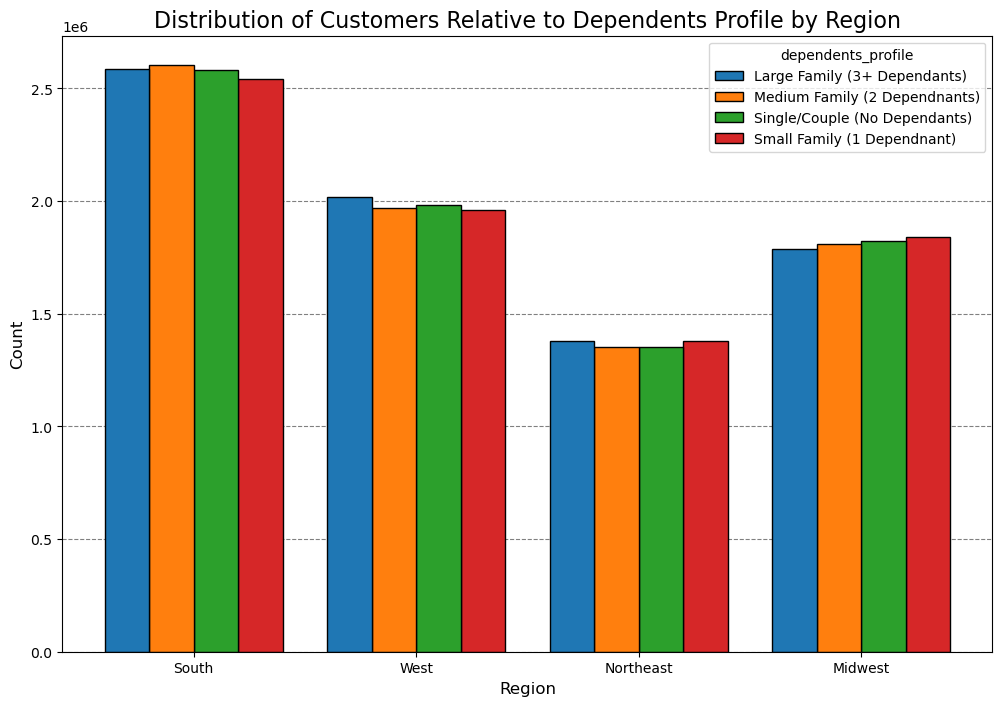

In [283]:
# Plot the histogram
plt.figure(figsize=(12, 8))
sns.histplot(
    data=ords_prod_dept_merge, 
    x='region', 
    hue='dependents_profile', 
    multiple='dodge', 
    shrink=0.8, 
    alpha=1,
    edgecolor='black'  # Add black edges
)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')  # Customize grid lines

# Customize the chart
plt.title('Distribution of Customers Relative to Dependents Profile by Region', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '8.3_dependents_by_region.png'), bbox_inches='tight')

# Show the plot
plt.show()

##### The South region has the highest customer count across all dependents' profiles, indicating a large and diverse population. 
##### This is followed closely by the West region, which also demonstrates a significant presence of customers across all categories.
##### Medium-sized families with two dependents consistently represent the largest group across all regions, followed by large families with three or more dependents.
##### Single or couple households without dependents and small families with one dependent have smaller, yet noticeable, contributions in all regions, with relatively uniform distributions.
##### The Northeast region shows the lowest overall customer count, highlighting a smaller market size compared to other regions. 
##### The Midwest region exhibits a balanced distribution across dependents' profiles, with no single category dominating significantly. 
##### These insights suggest that family size is a critical factor influencing customer distribution and can guide targeted marketing strategies for family-oriented products and services, particularly in the South and West regions, which hold the largest market opportunities.

### 8.4 Customers Profiles by Frequency 

In [291]:
income_freq_prof = pd.crosstab(ords_prod_dept_merge['income_group'],ords_prod_dept_merge['customer_frequency'],dropna = False)

In [293]:
income_freq_prof

customer_frequency,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High Income,5147242,684028,1655679
Low Income,5222249,790261,1728343
Lower-Middle Income,5344064,696434,1702445
Upper-Middle Income,5306749,707931,1724997
Very High Income,184172,16321,53649


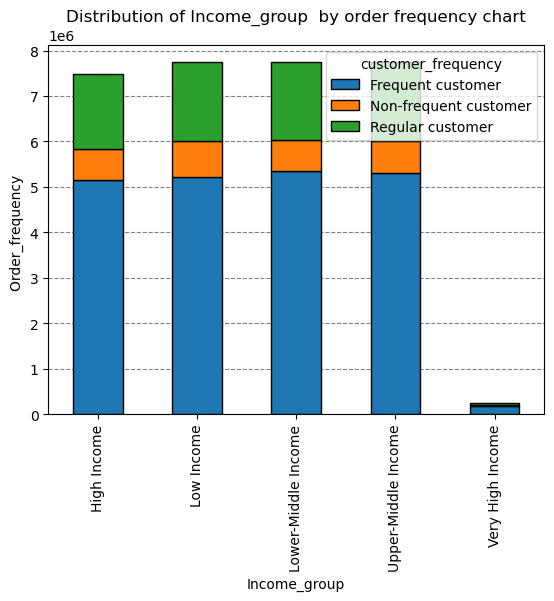

In [295]:
# Income Group and Order frequency Bar Chart

income_bar_freq = income_freq_prof.plot(kind='bar', stacked =True, edgecolor='black')

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Income_group')

# Exporting bar chart

income_bar_freq.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '8.4_income_freq_prof.png'))

##### Frequent customers dominate all income groups, particularly in the low-income, lower-middle income, and upper-middle income categories, highlighting a strong and consistent engagement from these segments.
##### Regular customers form the second-largest group, with notable contributions across all income categories but are slightly less prominent in the high-income and very high-income groups. 
##### Non-frequent customers represent a much smaller proportion overall, with the smallest presence in the very high-income group, likely indicating either lower population sizes in this group or less frequent shopping behavior.
#####  The very high-income group has the smallest overall customer count across all frequency types, reflecting its niche nature compared to the larger low and middle-income segments. 
##### These trends suggest that while frequent customers are the most valuable across all income groups, specific marketing strategies may be needed to increase engagement among regular and non-frequent customers, particularly in higher-income groups where their presence is minimal.

### 9 Produce suitable charts to illustrate your results and export them in your project folder.

##### Visualizations are saved and exported at various stages throughout the script.

#### 9.1 Additional Visualizations - busiest days of the week

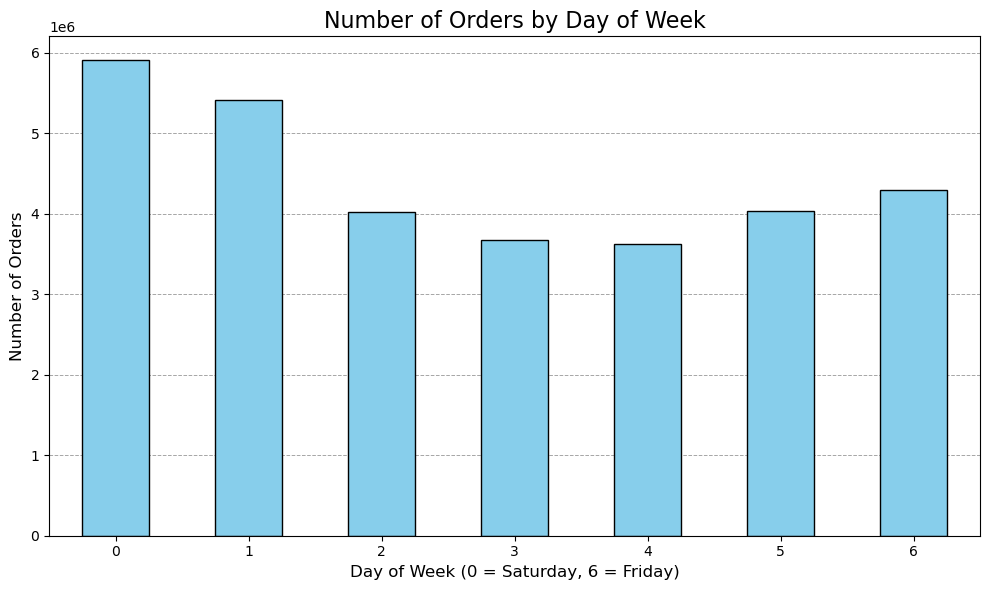

In [307]:
# Sort the data and plot the bar chart
orders_day_of_week_counts = ords_prod_dept_merge['orders_day_of_week'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
orders_day_of_week_counts.plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='black'  # Add black edges to the bars
)

# Overlay a grid behind the bars
plt.grid(axis='y', color='gray', linestyle='dashed', linewidth=0.7, alpha=0.7)
plt.gca().set_axisbelow(True)  # Ensure the grid is behind the bars

# Customize the chart
plt.title('Number of Orders by Day of Week', fontsize=16)
plt.xlabel('Day of Week (0 = Saturday, 6 = Friday)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # Rotate x-axis labels if needed for better readability

# Tight layout for cleaner display
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9.1_busy_dow.png'), bbox_inches='tight')

# Display the chart
plt.show()

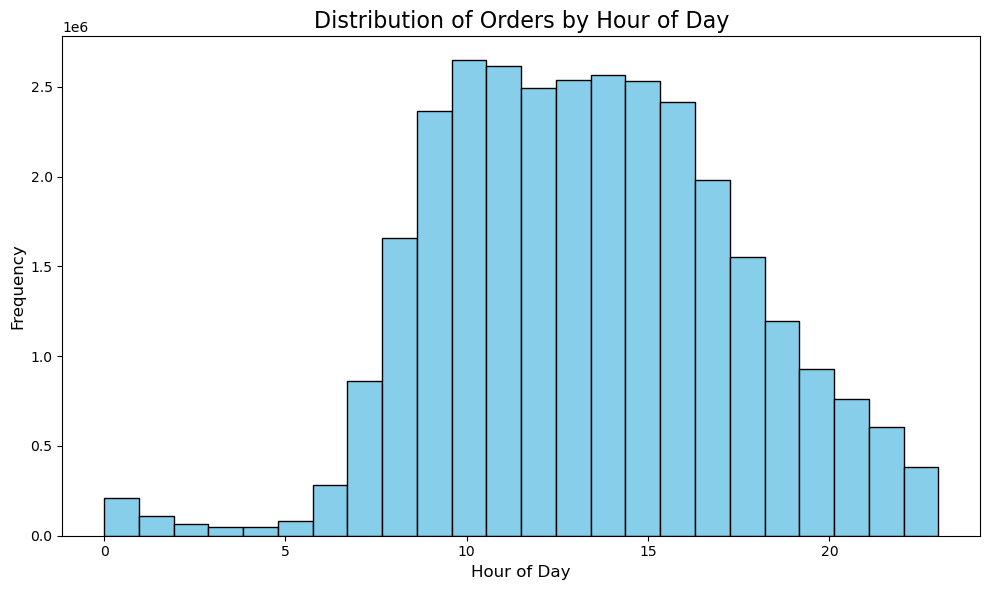

In [22]:
# Create the histogram
hist_hod = ords_prod_dept_merge['order_hour_of_day'].plot.hist(
    bins=24,
    edgecolor='black',
    figsize=(10, 6),
    color='skyblue'
)

# Add titles and labels
plt.title('Distribution of Orders by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9.1.1_hist_busiest_hod.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

#### 9.2 Additional Visualizations - connection between age and family status

In [28]:
freq_age_mar = ords_prod_dept_merge.groupby(['family_status','age_group'])['days_since_last_order'].mean().unstack(fill_value=0)
freq_age_mar

age_group,Boomers,Gen X,Gen Z,Millennials
family_status,,,,
divorced/widowed,10.785123,10.660741,0.000000,0.000000
living with parents and siblings,0.000000,0.000000,10.750995,0.000000
married,10.798944,10.858118,10.742584,10.803183
single,0.000000,10.706952,10.958700,10.873031


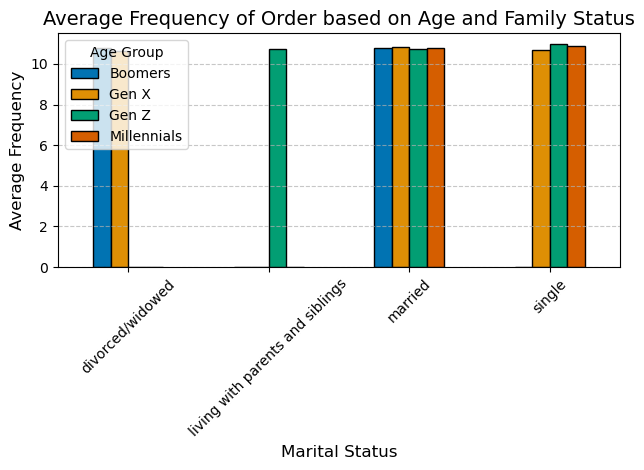

In [36]:
# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Plot the grouped bar chart
freq_age_mar.plot(
    kind='bar', 
    stacked=False, 
    color=colors,  # Apply the color palette
    edgecolor='black'  # Add black edges to bars
)

# Add titles and labels
plt.title('Average Frequency of Order based on Age and Family Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Frequency', fontsize=12)
plt.xticks(rotation=45)

# Add a dashed grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(title='Age Group')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9.2_freq_age_marr_status.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [34]:
spend_age_mar = ords_prod_dept_merge.groupby(['family_status','age_group'])['average_spend'].mean().unstack(fill_value=0)
spend_age_mar

age_group,Boomers,Gen X,Gen Z,Millennials
family_status,,,,
divorced/widowed,12.062293,10.168157,0.000000,0.000000
living with parents and siblings,0.000000,0.000000,10.890167,0.000000
married,11.751495,11.731478,12.953050,12.238344
single,0.000000,12.917893,13.143431,11.352212


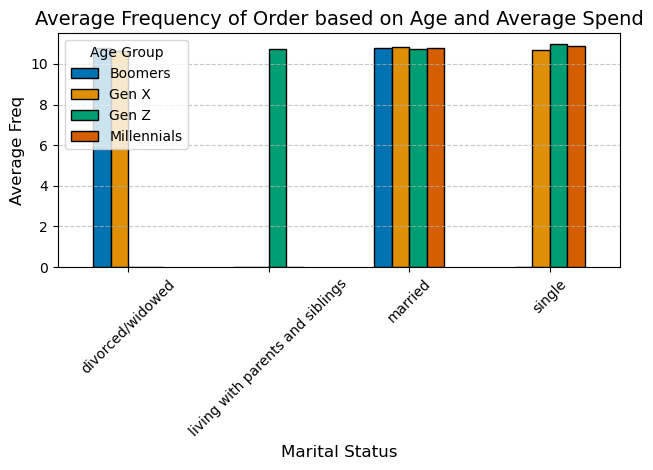

In [38]:
# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Plot the grouped bar chart
freq_age_mar.plot(
    kind='bar', 
    stacked=False, 
    color=colors,  # Apply the color palette
    edgecolor='black'  # Add black edges to bars
)

# Add titles and labels
plt.title('Average Frequency of Order based on Age and Average Spend', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Freq', fontsize=12)
plt.xticks(rotation=45)

# Add a dashed grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(title='Age Group')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9.2.1_spend_age_marr_status.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

#### 9.3 Additional Visualizations - price range groupings

In [46]:
# Create bins or categories for prices
bins = [0, 5, 15, 30, 50, float('inf')]
labels = ['$0-$5', '$5-$15', '$15-$30', '$30-$50', '$50+']
ords_prod_dept_merge['price_range'] = pd.cut(ords_prod_dept_merge['prices'], bins=bins, labels=labels, right=False)

In [50]:
# Explicitly set Group by price_range and aggregate
price_range_summary = ords_prod_dept_merge.groupby('price_range', observed=True).agg(
    order_count=('order_id', 'count'),
    total_sales=('prices', 'sum')
).reset_index()

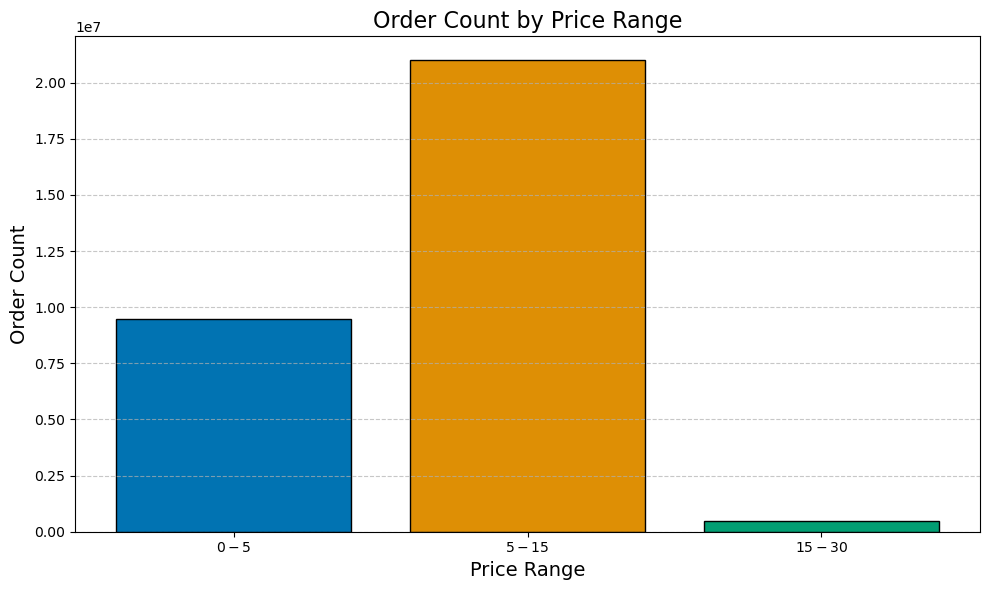

In [52]:
# Use a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    price_range_summary['price_range'], 
    price_range_summary['order_count'], 
    color=colors,  # Apply the colorblind palette
    edgecolor='black'  # Add black edging to bars
)

# Add titles and labels
plt.title('Order Count by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Order Count', fontsize=14)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed gridlines on the y-axis

# Adjust layout
plt.tight_layout()

# Save the figure to the specified path
plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', '9.3_bar_price_range_status.png'), 
    dpi=300, 
    bbox_inches='tight'
)

# Display the chart
plt.show()

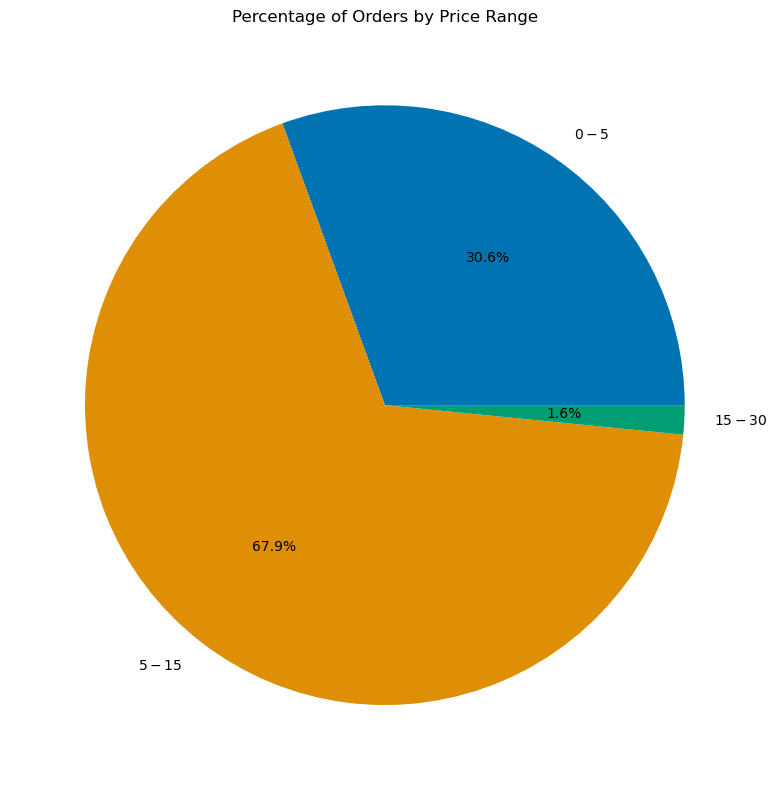

In [54]:
# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust size for better clarity
price_range_summary.set_index('price_range')['order_count'].plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages
    title='Percentage of Orders by Price Range',
    colors=sns.color_palette("colorblind")  # Use a colorblind-friendly palette
)

# Remove the y-axis label for a cleaner look
plt.ylabel('')

# Adjust layout
plt.tight_layout()

# Save the figure to the specified path
plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', '9.3.1_pie_price_range_status.png'),
    dpi=300,
    bbox_inches='tight'
)

# Display the chart
plt.show()

### Q10 Tidy up your script, export your final data set, and save your notebook

In [84]:
# Exporting New Merged Dataframe
ords_prod_dept_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prod_dept_merge.pkl'))